In [1]:
# !pip install pandas numpy seaborn matplotlib pycaret opencv-python

You should consider upgrading via the 'C:\AI\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder


import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

# 날짜 데이터 전처리

In [4]:
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['년'] = df['일자'].dt.year
    df['월'] = df['일자'].dt.month
    df['일'] = df['일자'].dt.day
    #df = df.drop('일자', axis=1)
    return df

In [5]:
# General preprocessing
train = process_date(train)
day_encoder = LabelEncoder()
train['요일'] = day_encoder.fit_transform(train['요일'])

test = process_date(test)
day_encoder = LabelEncoder()
test['요일'] = day_encoder.fit_transform(test['요일'])

# 식사가능자

In [6]:
train['식사가능자'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

# 전주 식계

In [7]:
from datetime import timedelta
train['전주중식계'] = 0
train['전주석식계'] = 0
idx = pd.DatetimeIndex(train['일자']) + timedelta(weeks=-1)
for i in range(len(train)):
    try:
        train['전주중식계'][i] = train[train['일자'] == str(idx[i])[:10]]['중식계']
        train['전주석식계'][i] = train[train['일자'] == str(idx[i])[:10]]['석식계']
    except:
        train['전주중식계'][i] = train.iloc[i,:]['중식계']
        train['전주석식계'][i] = train.iloc[i,:]['석식계']

train[['중식계', '전주중식계', '석식계', '전주석식계', '일자']].head(10)

,중식계,전주중식계,석식계,전주석식계,일자
0,1039.0,NaN,331.0,NaN,2016-02-01
1,867.0,NaN,560.0,NaN,2016-02-02
2,1017.0,NaN,573.0,NaN,2016-02-03
3,978.0,NaN,525.0,NaN,2016-02-04
4,925.0,NaN,330.0,NaN,2016-02-05
5,1045.0,978.0,550.0,525.0,2016-02-11
6,909.0,925.0,598.0,330.0,2016-02-12
7,1268.0,NaN,672.0,NaN,2016-02-15
8,1014.0,NaN,523.0,NaN,2016-02-16
9,916.0,NaN,588.0,NaN,2016-02-17


# 요일 평균 식계

<AxesSubplot:xlabel='요일', ylabel='석식계'>

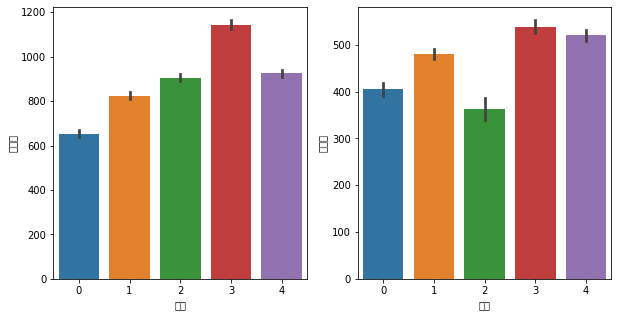

In [8]:
# 중식계와 석식계의 요일별 시각화
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='요일', y='중식계', data=train, ax=ax[0])
sns.barplot(x='요일', y='석식계', data=train, ax=ax[1])

# 월 화 수 목 금
# 왼쪽 : 중식계             오른쪽 : 석식계

In [9]:
train['요일평균중식계'] = 0
tmp = train.groupby('요일').mean()['중식계'].values
for i in range(len(tmp)):
    train['요일평균중식계'][train['요일'] == i] = tmp[i]

In [10]:
train['요일평균석식계'] = 0
tmp = train.groupby('요일').mean()['석식계'].values
for i in range(len(tmp)):
    train['요일평균석식계'][train['요일'] == i] = tmp[i]

# 월 평균 식계

<AxesSubplot:xlabel='월', ylabel='석식계'>

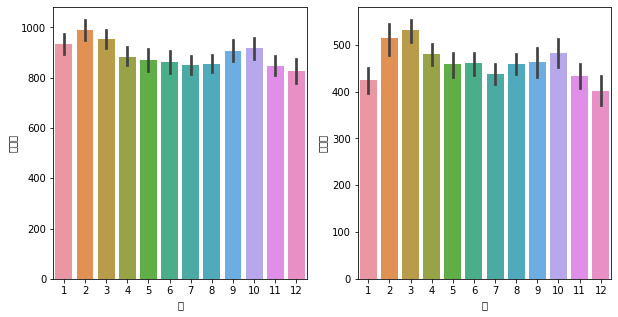

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='월', y='중식계', data=train, ax=ax[0])
sns.barplot(x='월', y='석식계', data=train, ax=ax[1])

In [12]:
train['월평균중식계'] = 0
tmp = train.groupby('월').mean()['중식계']
tmp_k = tmp.keys(); tmp_v = tmp.values 
for i in tmp_k:
    train['월평균중식계'][train['월'] == i] = tmp_v[i-1]

In [13]:
train['월평균석식계'] = 0
tmp = train.groupby('월').mean()['석식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균석식계'][train['월'] == i] = tmp_v[i-1]

# 공휴일 전후

In [14]:
#공휴일 지정 노가다
train['공휴일전후'] = 0

train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 1
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 1
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

# 자기계발의 날

In [15]:
train['자기계발의날'] = 0
train['자기계발의날'].loc[(train['석식계'] == 0) & (train['공휴일전후'] == 0) & (train['요일'] == 2)] = 1

# Test 데이터 전처리
## 식사가능자

In [16]:
test['식사가능자'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

## 요일평균/월평균 식계

In [17]:
def make_dow_avg(df_test, df_prev):
    dow_avg_ln = df_prev.groupby('요일').mean()['중식계']
    dow_avg_dn = df_prev.groupby('요일').mean()['석식계']
    
    df_test['요일평균중식계'] = 0
    tmp = dow_avg_ln.values
    for i in range(len(tmp)):
        df_test['요일평균중식계'][df_test['요일'] == i] = tmp[i]
        
    df_test['요일평균석식계'] = 0
    tmp = dow_avg_dn.values
    for i in range(len(tmp)):
        df_test['요일평균석식계'][df_test['요일'] == i] = tmp[i]
    
    return df_test

def make_month_avg(df_test, df_prev):
    month_avg_ln = df_prev.groupby('월').mean()['중식계']
    month_avg_dn = df_prev.groupby('월').mean()['석식계']
    
    df_test['월평균중식계'] = 0
    tmp = month_avg_ln
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균중식계'][df_test['월'] == i] = tmp_v[i-1]
        
    df_test['월평균석식계'] = 0
    tmp = month_avg_dn
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균석식계'][df_test['월'] == i] = tmp_v[i-1]
        
    return df_test

## 공휴일 전후

In [18]:
test['공휴일전후'] = 0
test['공휴일전후'][10] =1
test['공휴일전후'][20] = 1

In [19]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '년', '월', '일',
       '식사가능자', '전주중식계', '전주석식계', '요일평균중식계', '요일평균석식계', '월평균중식계', '월평균석식계',
       '공휴일전후', '자기계발의날'],
      dtype='object')

In [20]:
test.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '년', '월', '일', '식사가능자', '공휴일전후'],
      dtype='object')

# 모델

# 첫주 예측

In [22]:
submission_df = pd.read_csv('./datasets/sample_submission.csv')

In [23]:
res = []
X_test = test[['요일', '본사시간외근무명령서승인건수', '공휴일전후', '월', '일자', '일', '년',
                '본사휴가자수', '본사출장자수', '식사가능자']][:5]

In [24]:
from datetime import timedelta
X_test = make_dow_avg(X_test, train)
X_test = make_month_avg(X_test, train)
X_test['전주중식계'] = 0
X_test['전주석식계'] = 0
index = pd.DatetimeIndex(X_test['일자']) + timedelta(weeks=-1)
for i in range(5):
    X_test['전주중식계'][i] = train[train['일자'] == str(index[i])[:10]]['중식계']
    X_test['전주석식계'][i] = train[train['일자'] == str(index[i])[:10]]['석식계']

## 첫주 중식계

In [25]:
from pycaret.regression import *

In [26]:
X_train_ln = train[['요일', '본사시간외근무명령서승인건수', '전주중식계', '요일평균중식계', '월평균중식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '중식계']]

In [27]:
reg = setup(session_id=1,
            data=X_train_ln,
            target='중식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,1
1,Target,중식계
2,Original Data,"(1205, 10)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 9)"


In [28]:
gbr_l = tune_model(create_model('gbr', criterion='mae'), optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,86.1204,13030.3960,114.1508,0.7372,0.1464,0.1060
1,79.6981,12158.1753,110.2641,0.6478,0.1200,0.0872
2,68.5481,8031.1349,89.6166,0.8092,0.1117,0.0850
3,63.5969,7443.9782,86.2785,0.8424,0.1100,0.0813
4,61.1338,6088.8950,78.0314,0.8457,0.0863,0.0684
5,66.0675,8664.3347,93.0824,0.8083,0.1201,0.0819
6,80.4719,12199.2126,110.4500,0.7250,0.1266,0.0932
7,68.0443,7025.5639,83.8186,0.7857,0.0952,0.0774
8,72.7677,9251.5356,96.1849,0.8100,0.1064,0.0832
9,73.6139,9728.6851,98.6341,0.8201,0.1399,0.0966


In [29]:
pred_holdouts = predict_model(gbr_l)
final_model_l = finalize_model(gbr_l)
final_model_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,68.6501,8673.4607,93.1314,0.7994,0.1186,0.0864


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
pred_ln = predict_model(final_model_l, X_test[['요일', '본사시간외근무명령서승인건수', '전주중식계', '요일평균중식계', '월평균중식계', '공휴일전후','본사휴가자수', '본사출장자수', '식사가능자']])

In [31]:
submission_df['중식계'][:5] = pred_ln['Label']

## 첫주 석식계

In [32]:
X_train_dn = train[['요일', '본사시간외근무명령서승인건수', '전주석식계', '요일평균석식계', '월평균석식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '석식계']]

In [33]:
reg = setup(session_id=2,
            data=X_train_dn,
            target='석식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,2
1,Target,석식계
2,Original Data,"(1205, 10)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 9)"


In [34]:
top5 = compare_models(n_select=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,66.6602,9827.4937,98.7760,0.4562,1.0472,0.1322,0.0800
catboost,CatBoost Regressor,66.9787,9650.9901,97.7758,0.4758,1.0421,0.1333,0.6720
rf,Random Forest Regressor,67.6418,10123.3482,100.2064,0.4549,1.0542,0.1335,0.1060
gbr,Gradient Boosting Regressor,67.9979,9926.3927,99.3448,0.4619,1.0535,0.1350,0.0290
xgboost,Extreme Gradient Boosting,68.3102,10263.0304,100.8668,0.4451,1.0450,0.1351,0.3490
huber,Huber Regressor,69.0935,11181.4029,105.0360,0.4088,1.0792,0.1343,0.0050
lightgbm,Light Gradient Boosting Machine,70.0853,10326.9118,101.3764,0.4394,1.0513,0.1402,0.0610
knn,K Neighbors Regressor,70.8080,10656.2069,102.9776,0.4227,1.0382,0.1478,0.0050
lasso,Lasso Regression,72.1087,10817.0236,103.5440,0.4225,1.0662,0.1425,0.0040
lar,Least Angle Regression,72.1156,10785.3875,103.4351,0.4203,1.0635,0.1422,0.0040


In [35]:
blended_d = blend_models(top5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,70.8067,12270.3948,110.7718,0.4460,1.3146,0.1418
1,63.8552,8883.5977,94.2528,0.1766,0.2572,0.1431
2,64.7839,10147.9382,100.7370,0.4850,1.1286,0.1125
3,62.5378,7493.6168,86.5657,0.5265,0.8779,0.1309
4,63.8033,8280.7394,90.9986,0.5410,0.9223,0.1299
5,61.9642,8547.0814,92.4504,0.4370,0.9169,0.1230
6,67.4598,9200.0723,95.9170,0.5977,1.2210,0.1357
7,61.2088,6970.6813,83.4906,0.6382,1.0474,0.1264
8,69.4471,10659.0987,103.2429,0.4903,1.1067,0.1357
9,66.5833,11321.2959,106.4016,0.5702,1.6636,0.1023


In [36]:
pred_holdouts = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,68.3726,10569.4105,102.8076,0.4562,1.1251,0.1365


VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                  

In [37]:
pred_dn = predict_model(final_model_d, X_test[['요일', '본사시간외근무명령서승인건수', '전주석식계', '요일평균석식계', '월평균석식계', '공휴일전후','본사휴가자수', '본사출장자수', '식사가능자']])

In [38]:
submission_df['석식계'][:5] = pred_dn['Label']

# 나머지주 예측

In [39]:
res = []
X_test = test[['일자', '요일', '본사시간외근무명령서승인건수', '공휴일전후', '본사출장자수', '본사휴가자수',
                 '식사가능자', '월', '일']]
X_test["중식계"] = 0
for i in range(len(X_test)):
    if i%5 == 0:
        res.append(X_test[i:i+5])

In [40]:
res = res[1:]

## 나머지주 중식계

In [41]:
X_train_ln = train[['요일', '본사시간외근무명령서승인건수', '요일평균중식계', '월평균중식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '중식계']]

In [42]:
reg = setup(session_id=1,
            data=X_train_ln,
            target='중식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,1
1,Target,중식계
2,Original Data,"(1205, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 8)"


In [43]:
gbr_l = tune_model(create_model('gbr', criterion='mae'), optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.6952,13274.0347,115.2130,0.7323,0.1490,0.1103
1,79.7318,11836.6033,108.7962,0.6572,0.1191,0.0881
2,67.1684,7847.5617,88.5865,0.8135,0.1121,0.0841
3,61.9258,7630.7982,87.3544,0.8385,0.1225,0.0851
4,61.6743,6297.0919,79.3542,0.8405,0.0884,0.0688
5,68.6573,9070.4282,95.2388,0.7993,0.1248,0.0854
6,75.7610,11356.2094,106.5655,0.7440,0.1200,0.0869
7,68.6227,7019.2228,83.7808,0.7859,0.0973,0.0788
8,72.8907,9051.1285,95.1374,0.8141,0.1095,0.0853
9,69.5270,9220.2269,96.0220,0.8295,0.1391,0.0934


In [44]:
pred_holdouts = predict_model(gbr_l)
final_model_l = finalize_model(gbr_l)
final_model_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,67.9026,8575.2525,92.6027,0.8016,0.1152,0.0842


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### 중식

In [45]:
from datetime import timedelta
prev = train
for idx, part_test in enumerate(res):
    part_test = make_dow_avg(part_test, prev)
    part_test = make_month_avg(part_test, prev)
    
    pred_ln = predict_model(final_model_l, part_test.drop(['일자', '월'], axis=1))
    
    submission_df['중식계'][5*(idx+1):5*(idx+1)+5] = pred_ln['Label']

# 나머지주 석식계

In [46]:
X_train_dn = train[['요일', '본사시간외근무명령서승인건수', '공휴일전후', '요일평균석식계', '월평균석식계', '본사출장자수',
                 '식사가능자', '월', '일', '석식계']]

In [47]:
reg = setup(session_id=2,
            data=X_train_dn,
            target='석식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,2
1,Target,석식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 20)"


In [48]:
top5 = compare_models(n_select=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,59.9686,7011.3864,83.2710,0.6200,0.8731,0.1308,0.4350
rf,Random Forest Regressor,60.4386,7604.0315,86.8175,0.5927,0.8677,0.1341,0.0900
et,Extra Trees Regressor,61.5038,8036.8636,89.1525,0.5535,0.8848,0.1326,0.0810
xgboost,Extreme Gradient Boosting,62.9686,7824.8812,88.0024,0.5673,0.8209,0.1406,0.2730
gbr,Gradient Boosting Regressor,63.2344,7632.6913,87.1164,0.5847,0.9184,0.1376,0.0230
lightgbm,Light Gradient Boosting Machine,63.3927,7671.3098,87.2022,0.5848,0.8890,0.1413,0.0530
knn,K Neighbors Regressor,71.5468,9953.2297,99.5114,0.4593,0.9952,0.1579,0.0060
huber,Huber Regressor,72.0926,11569.0160,107.0669,0.3740,1.0768,0.1437,0.0070
par,Passive Aggressive Regressor,73.9906,11810.5773,108.1772,0.3605,1.0788,0.1512,0.0040
lasso,Lasso Regression,74.7104,11006.9206,104.6367,0.4036,1.0567,0.1521,0.0040


In [49]:
blended_d = blend_models(top5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,62.1770,9998.1237,99.9906,0.5486,1.1453,0.1441
1,61.8525,7271.8956,85.2754,0.3260,0.2005,0.1425
2,60.3428,7236.7836,85.0693,0.6327,0.9715,0.1162
3,57.2070,5965.1315,77.2343,0.6231,0.4910,0.1291
4,57.0897,6884.3372,82.9719,0.6184,0.8641,0.1236
5,52.5017,5358.3703,73.2009,0.6470,0.7306,0.1110
6,60.2189,5852.2712,76.5001,0.7441,0.9804,0.1406
7,57.4311,5445.2126,73.7917,0.7174,0.9090,0.1302
8,63.4517,7463.8202,86.3934,0.6431,0.9058,0.1505
9,60.3850,8527.4128,92.3440,0.6763,1.5474,0.1082


In [50]:
pred_holdouts = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,62.1692,8211.2886,90.6162,0.5775,0.9770,0.1413


VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x000002173812B160>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   m

### 석식

In [51]:
from datetime import timedelta
prev = train
for idx, part_test in enumerate(res):
    part_test = make_dow_avg(part_test, prev)
    part_test = make_month_avg(part_test, prev)
    
    pred_dn = predict_model(final_model_d, part_test.drop(['일자'], axis=1))
    
    submission_df['석식계'][5*(idx+1):5*(idx+1)+5] = pred_dn['Label']

# Model 분석

모든 Model Prediction을 진행한 뒤, 저희가 만든 Model을 분석했습니다.<br>
분석 도구로는 Pycaret의 plot_model을 사용했고, 이를 이용해 Model의 Residual 분포를 확인해보았습니다.

- 중식: 중식계같은 경우 대부분 고르게 분포한 것처럼 보이지만 residual의 값이 양수로 치우쳐져 있는 것을 확인할 수 있습니다. 이에 따라 저희는 Model에서 얻은 최종 값에 먼저 내림을 통해 소수점을 모두 제거해준 뒤, 30을 추가로 더해 오차의 분포를 줄였습니다.
- 석식: 석식계같은 경우는 대부분 고르게 분포한 것처럼 보이지만 residual의 값이 음수로 치우쳐져 있는 것을 확인할 수 있습니다. 이에 따라 저희는 Model에서 얻은 최종 값에 먼저 내림을 통해 소수점을 모두 제거해준 뒤, 30을 추가로 빼주어 오차의 분포를 줄였습니다.

In [53]:
submission_df["중식계"] = submission_df["중식계"] // 1 + 30

In [54]:
submission_df["석식계"] = submission_df["석식계"] // 1 - 30

In [55]:
submission_df.to_csv("./submission.csv", index=False)